In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import copy

# import seaborn as sns

In [4]:
def finding_unique_LPP():
    unique_values = []
    elements = os.listdir("../Open-LPP-data/base_complete")
    for i in range(int(len(elements) / 2)):
        df = pd.read_csv(
            f"../Open-LPP-data/base_complete/OPEN_LPP_{(i+2014)}.CSV",
            encoding="ISO-8859-1",
            sep=";",
        )
        values = df["L_SC1"].unique().tolist()
        for value in values:
            if value in unique_values:
                pass
            else:
                unique_values.append(value)

    return unique_values

In [18]:
optical_HICP = pd.read_csv(
    "../data/HICP/HICP-Corrective-eye-glasses-and-contact-lenses-France-Annual-parts-per-1000.csv"
)
# optical_HICP = optical_HICP[optical_HICP["TIME PERIOD"]>=2014]
optical_HICP.head()

,DATE,TIME PERIOD,HICP - Corrective eye-glasses and contact lenses (ICP.A.FR.N.061310.4.INW)
0,1996-12-31,1996,0.0
1,1997-12-31,1997,0.0
2,1998-12-31,1998,0.0
3,1999-12-31,1999,0.0
4,2000-12-31,2000,0.0


In [33]:
def adjusted_price(df, initial_price, year_initial_price):
    df = df[df["TIME PERIOD"] >= year_initial_price]
    for i in range(
        len(df)
    ):  # calculating the equivalent for the last year of the df (2024)
        initial_price = initial_price * (1 + (df.iloc[i, 2] / 1000))
    return initial_price


optical_expenditures = {}


def get_expenditures(inflation_adjustment):
    elements = os.listdir("../Open-LPP-data/base_complete")
    for i in range(int(len(elements) / 2)):
        df = pd.read_csv(
            f"../Open-LPP-data/base_complementaire/NB_{i+2014}_lpp.CSV",
            encoding="ISO-8859-1",
            sep=";",
        )
        df = pd.DataFrame(
            {
                "L_CODE_LPP": df["L_CODE_LPP"],
                "Quantity": df["QTE"],
                "Financing": df["REM"],
            }
        )
        final_mask = df["L_CODE_LPP"].str.contains(
            r"OPTIQUE|AUDIO|OCULAIRES|OCULAIRE|VERRE", case=False, na=False
        )
        df = df[final_mask]
        df["Total"] = df["Quantity"] * df["Financing"]
        key = str(i + 2014)
        sum = df["Total"].sum()

        if inflation_adjustment == True:
            optical_expenditures[key] = adjusted_price(optical_HICP, sum, i + 2014)
            # print("test")
        else:
            optical_expenditures[key] = sum

    return optical_expenditures

In [34]:
optical_expenditures_adjusted = get_expenditures(inflation_adjustment=True)
optical_expenditures_adjusted = copy.deepcopy(optical_expenditures_adjusted)
optical_expenditures_adjusted

{'2014': 810557164447922.2,
 '2015': 926119886530734.4,
 '2016': 976106185648903.2,
 '2017': 984264974630622.6,
 '2018': 1098336293760713.6,
 '2019': 1099933796116535.8,
 '2020': 4764083193776.322,
 '2021': 13447311806953.035,
 '2022': 4854243228259.715,
 '2023': 7279732863115.794}

In [35]:
optical_expenditures_non_adjusted = get_expenditures(inflation_adjustment=False)
optical_expenditures_non_adjusted

{'2014': 768927597068601.4,
 '2015': 878555110215519.8,
 '2016': 925974153008713.9,
 '2017': 939157465230253.2,
 '2018': 1054058498856208.9,
 '2019': 1061619028316986.5,
 '2020': 4623836092879.85,
 '2021': 13126098401180.47,
 '2022': 4766009835421.94,
 '2023': 7192441135968.31}

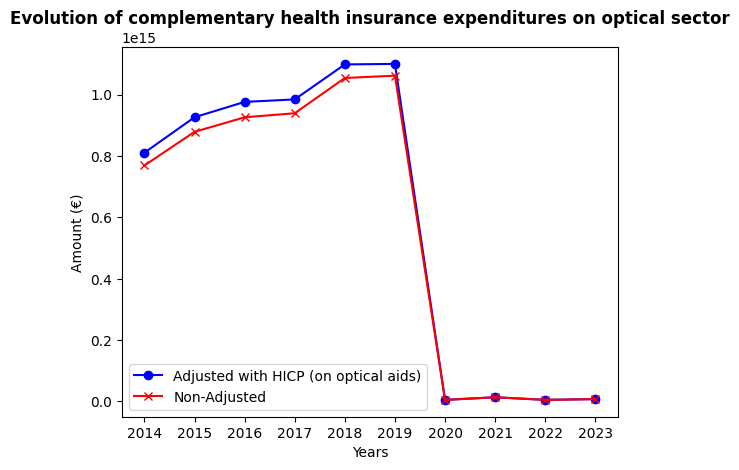

In [36]:
plt.plot(
    list(optical_expenditures_adjusted.keys()),
    list(optical_expenditures_adjusted.values()),
    marker="o",
    color="blue",
    label="Adjusted with HICP (on optical aids)",
)
plt.plot(
    list(optical_expenditures_non_adjusted.keys()),
    list(optical_expenditures_non_adjusted.values()),
    marker="x",
    color="red",
    label="Non-Adjusted",
)

plt.xlabel("Years")
plt.ylabel("Amount (€)")

plt.title(
    "Evolution of complementary health insurance expenditures on optical sector",
    fontweight="bold",
)
plt.legend()